# Feature Selection and Model Training Notebook

This Jupyter Notebook showcases the process of feature selection and model training using the XGBoost classifier on a dataset. The notebook includes the following steps:

1. Importing necessary libraries for data preprocessing, feature selection, and model evaluation.
2. Loading and combining datasets.
3. Data preprocessing tasks, including dropping unnecessary columns, one-hot encoding categorical features, and imputing missing values.
4. Feature selection using the RandomForest classifier.
5. Plotting feature importances to visualize the impact of selected features.
6. Splitting the data into training and testing sets.
7. Training an XGBoost classifier on the selected features.
8. Evaluating the model's accuracy on the testing set.
9. Exporting the trained model and other essential objects for future use.

**Prerequisites:**
- Python environment with required libraries installed (`pandas`, `sklearn`, `xgboost`, `matplotlib`).
- Datasets should be available in the specified file paths.
- The `filter_pcap_script.py` script for filtering PCAP files should be available in the same directory.

**Note:**
- Ensure that the datasets are correctly loaded from the provided file paths.
- The model evaluation results and exported objects are shown in the notebook's output.

Feel free to modify the code to suit your specific dataset and use case.


## Import Libraries

In [14]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import xgboost as xgb
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load Dataset

In [12]:
# Load the dataset
training_data = pd.read_csv(r'../unsw-nb15 dataset/UNSW_NB15_training-set.csv')
testing_data = pd.read_csv(r'../unsw-nb15 dataset/UNSW_NB15_testing-set.csv')
data = pd.concat([training_data, testing_data], ignore_index=True)
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [4]:
training_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [5]:
testing_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [7]:
training_data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

# Data Preprocessing


#### Drop Unnecessary Columns

In [8]:
training_data = training_data.drop(['attack_cat', 'id'], axis=1)

#### Separate the features and target variable for the full dataset.

In [9]:
X_full = training_data.drop('label', axis=1)
y_full = training_data['label']

#### Identify and perform one-hot encoding for categorical columns.

In [10]:
# Identify categorical columns
categorical_cols = X_full.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
encoder.fit(X_full[categorical_cols])  # Fitting on the full data

# Encoding full data
encoded_cat_full = encoder.transform(X_full[categorical_cols])
encoded_cat_df_full = pd.DataFrame(encoded_cat_full, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded full data
X_encoded_full = pd.concat([X_full.drop(categorical_cols, axis=1).reset_index(drop=True), encoded_cat_df_full.reset_index(drop=True)], axis=1)

C:\Users\21650\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Missing Value Imputation using IterativeImputer

In [11]:
# Impute missing values
imputer = IterativeImputer(max_iter=10, random_state=42)
X_imputed_full = imputer.fit_transform(X_encoded_full)

KeyboardInterrupt: 

## Feature selection with RandomForest


In [7]:
# Feature selection with RandomForest
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
feature_selector.fit(X_imputed_full, y_full)

# Extract and print selected features
selected_features_mask = feature_selector.get_support()
all_features = X_encoded_full.columns.tolist()
selected_features = [feature for i, feature in enumerate(all_features) if selected_features_mask[i]]
print("number of selected features : ", len(selected_features), "\n")
print("Selected features:", selected_features)

# Use only the selected features
X_selected = pd.DataFrame(X_imputed_full, columns=all_features)[selected_features]

number of selected features :  35 

Selected features: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'proto_tcp', 'state_INT']


### Plot Feature Importances

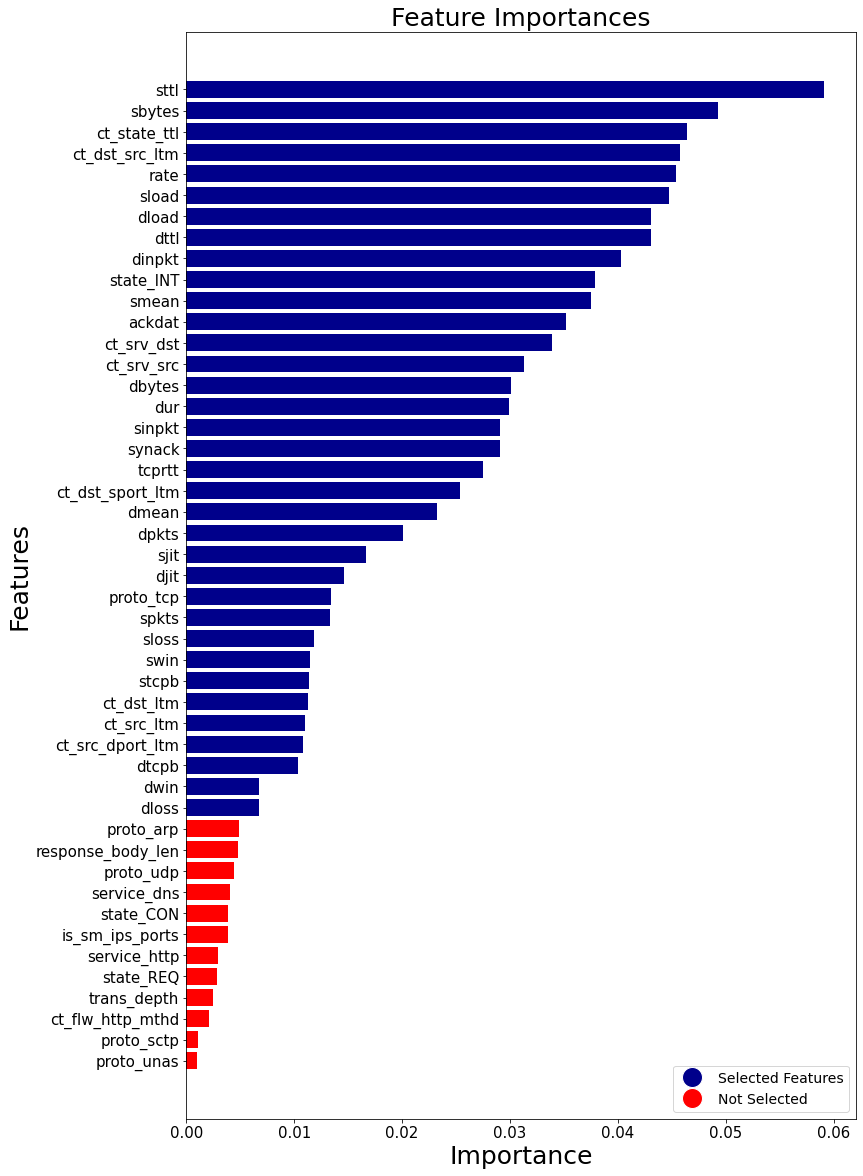

In [8]:
feature_importances = feature_selector.estimator_.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = [all_features[i] for i in sorted_idx]
selected_mask = feature_selector.get_support()
sorted_selected = [selected_mask[i] for i in sorted_idx]
threshold = 0.001
non_zero_features = [feature for feature, importance in zip(sorted_features, sorted_importances) if importance > threshold]
non_zero_importances = [importance for importance in sorted_importances if importance > threshold]

# Plot
plt.figure(figsize=(12, 20))
bar_colors = ['darkblue' if is_selected else 'r' for is_selected in sorted_selected[:len(non_zero_features)]]
plt.barh(non_zero_features, non_zero_importances, color=bar_colors)
plt.xlabel('Importance', fontsize=25)
plt.ylabel('Features', fontsize=25)
plt.title('Feature Importances', fontsize=25)
plt.gca().invert_yaxis()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
selected_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', markersize=20)
not_selected_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=20)
plt.legend([selected_patch, not_selected_patch], ['Selected Features', 'Not Selected'], loc='lower right', fontsize=14)
plt.show()



# Train and Evaluate the Model

### Split the Data

Split the data into training and testing sets.

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y_full, test_size=0.2, random_state=42)

### Train the Model

Train an XGBoost classifier.

In [10]:
clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

C:\Users\21650\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

### Test the Model

In [11]:
# Test the model's accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

Accuracy of the model: 0.95


# Export the trained model and other necessary objects

In [12]:
import joblib

joblib.dump(encoder, 'encoder.joblib')
joblib.dump(imputer, 'imputer.joblib')
joblib.dump(categorical_cols, 'categorical_cols.joblib')
joblib.dump(all_features, 'all_features.joblib')
model_filename = 'xgboost_model.joblib'
joblib.dump(clf, model_filename)

['xgboost_model.joblib']